### Bright SNe lightcurves

In [1]:
import sys, time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Please do not use this dummy token. Get your own at
https://lasair-iris.roe.ac.uk/api#auth_token

In [2]:
import lasair
try:
    import settings
    token = settings.token
except:
    token = '4b762569bb349bd8d60f1bc7da3f39dbfaefff9a'
L = lasair.lasair_client(token)

Now we query for objects with the Sherlock classification SN

In [3]:
conditions = """
sherlock_classifications.classification = "SN"
AND objects.gmag < 19 AND objects.rmag < 19
AND objects.ncandgp > 12
"""

In [4]:
rows = L.query(
    'objects.objectId', 
    'objects, sherlock_classifications', 
    conditions, 
    limit=10)
objectIds = [row['objectId'] for row in rows]

Here is a simple plot of a lightcurve

In [5]:
def plotLC(lightcurve):
    objectId = lightcurve['objectId']
    jd_now = time.time()/86400 + 40587.0 + 2400000.5
    color = {1:'green', 2:'red'}
    for fid in [1,2]:
        since = []
        magpsf = []
        sigmapsf = []
        for cand in lightcurve['candidates']:
            if cand['fid'] == fid:
                since.append(cand['jd'] - jd_now)
                magpsf.append(cand['magpsf'])
                sigmapsf.append(cand['sigmapsf'])
        plt.errorbar(since, magpsf, yerr=sigmapsf, c=color[fid])
        plt.xlabel("days before %.2f" % jd_now)
        plt.ylabel("psf mag")
        plt.title('https://lasair-iris.roe.ac.uk/objects/%s' % objectId)
    plt.gca().invert_yaxis()
    plt.show()

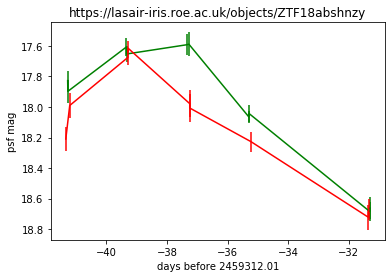

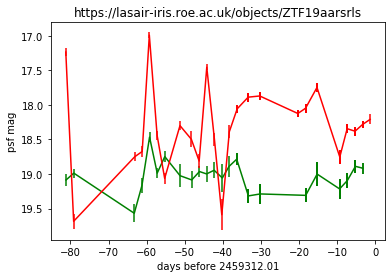

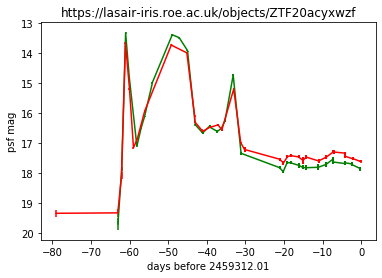

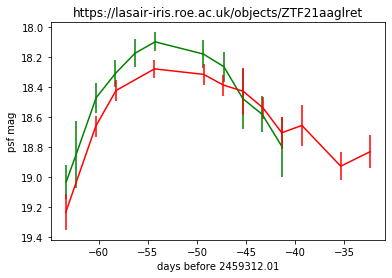

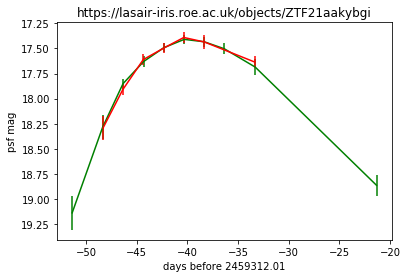

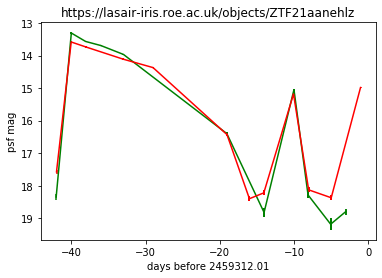

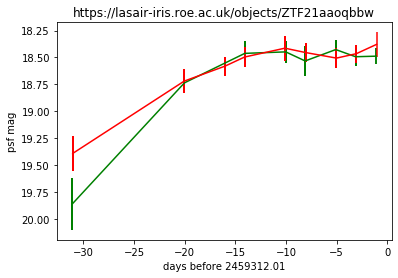

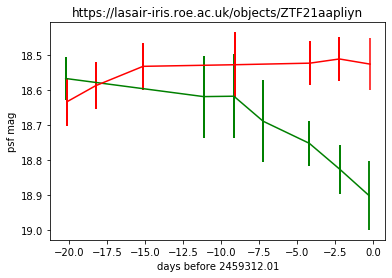

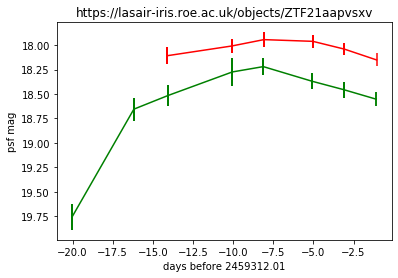

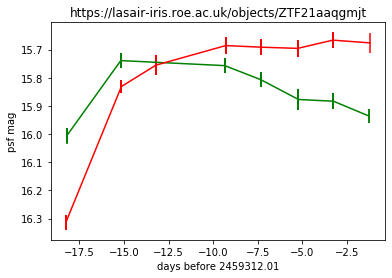

In [6]:
lcs = L.lightcurves(objectIds)
for lc in lcs:
    plotLC(lc)